In [1]:
# Instalar las dependencias necesarias
!pip install ultralytics  # Instala la biblioteca Ultralytics para YOLOv8
!pip install torch torchvision  # Instala PyTorch si no está instalado

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 15.5 MB/s eta 0:00:00


In [2]:
from google.colab import files

# Cargar el archivo ZIP
uploaded = files.upload()

Saving labels_val.zip to labels_val.zip
Saving images_val.zip to images_val.zip
Saving images_test.zip to images_test.zip
Saving labels_train.zip to labels_train.zip
Saving labels_test.zip to labels_test.zip
Saving images_train.zip to images_train.zip


In [3]:
import zipfile
import os

# Ruta base para los archivos en /content
base_dir = '/content'

# Definir la estructura deseada
structure = {
    'train': {
        'images': 'images_train.zip',
        'labels': 'labels_train.zip'
    },
    'val': {
        'images': 'images_val.zip',
        'labels': 'labels_val.zip'
    },
    'test': {
        'images': 'images_test.zip',
        'labels': 'labels_test.zip'
    }
}

# Procesar y descomprimir los archivos según la estructura
for folder, files in structure.items():
    # Crear carpeta principal si no existe
    folder_path = os.path.join(base_dir, folder)
    os.makedirs(folder_path, exist_ok=True)

    for subfolder, zip_filename in files.items():
        # Crear subcarpeta dentro de la carpeta principal
        subfolder_path = os.path.join(folder_path, subfolder)
        os.makedirs(subfolder_path, exist_ok=True)

        # Ruta completa del archivo .zip
        zip_path = os.path.join(base_dir, zip_filename)

        # Verificar si el archivo .zip existe
        if os.path.exists(zip_path):
            # Descomprimir el archivo directamente en la subcarpeta
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                for file in zip_ref.namelist():
                    # Comprobar si el elemento es un archivo (no un directorio)
                    if not file.endswith('/'):
                        # Extraer solo el contenido (evitando subcarpetas internas)
                        extracted_path = os.path.join(subfolder_path, os.path.basename(file))
                        with zip_ref.open(file) as source, open(extracted_path, 'wb') as target:
                            target.write(source.read())
                print(f"Descomprimido: {zip_filename} en {subfolder_path}")
        else:
            print(f"Archivo no encontrado: {zip_path}")

Descomprimido: images_train.zip en /content/train/images
Descomprimido: labels_train.zip en /content/train/labels
Descomprimido: images_val.zip en /content/val/images
Descomprimido: labels_val.zip en /content/val/labels
Descomprimido: images_test.zip en /content/test/images
Descomprimido: labels_test.zip en /content/test/labels


In [4]:
# Crear el archivo data.yaml
data_yaml = """
train: /content/train/images
val: /content/val/images
test: /content/test/images

nc: 5  # Número de clases (ajusta según tus clases)

names:
- cells-A6sP
- lumen
- nolumen
- notumor
- tumor
"""

# Guardar el archivo
with open("/content/data.yaml", "w") as f:
    f.write(data_yaml)

print("Archivo data.yaml creado en /content/data.yaml")

Archivo data.yaml creado en /content/data.yaml


In [5]:
from ultralytics import YOLO

# Configuración de entrenamiento
epochs = 30       # Número de épocas
img_size = 640    # Tamaño de las imágenes
batch_size = 16   # Tamaño del batch
device = 0        # GPU a utilizar (Colab proporciona acceso a GPUs)
data_yaml = '/content/data.yaml'  # Ruta al archivo data.yaml

# Cargar el modelo
model = YOLO('yolo11n.pt')

# Entrenar el modelo con hiperparámetros ajustados
model.train(
    data=data_yaml,
    epochs=epochs,
    imgsz=img_size,
    batch=batch_size,
    device=device,
    lr0=0.001111,         # Tasa de aprendizaje inicial optimizada
    momentum=0.9,         # Momentum optimizado
    weight_decay=0.001,   # Decaimiento del peso optimizado
    optimizer='AdamW',    # Optimizador utilizado
    freeze=[23],          # Capa congelada (opcional, basada en el entrenamiento previo)
    verbose=True          # Muestra detalles del entrenamiento
)

print("Entrenamiento completado.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 68.5MB/s]


Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=[23], multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/train/labels... 5314 images, 8 backgrounds, 0 corrupt: 100%|██████████| 5322/5322 [00:02<00:00, 2287.08it/s]

train: WARNING ⚠️ /content/train/images/106_png_jpg.rf.3a611413b640f44920d80c1b6b377bcd.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/106_png_jpg.rf.41d0b720c9a46b8189277f11a37fe92d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/106_png_jpg.rf.c0e3cc5493d949cb4e448c594c9ce229.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/106_png_jpg.rf.c3e153a450b8ee3ce952588117406445.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/135_png_jpg.rf.202abd7ae544b0e6ada1e8ec3562878f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/135_png_jpg.rf.6fd50ecf930de39b0abc6ec857c37bad.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/155_png_jpg.rf.451c2b097d6462c535e8d7bd0b070c46.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/155_png_jpg.rf.ae0f275662b3206aa2fc70ac16064252.jpg: 1 duplicate labels removed


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/val/labels... 725 images, 1 backgrounds, 0 corrupt: 100%|██████████| 726/726 [00:00<00:00, 1138.00it/s]


val: New cache created: /content/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.86G      1.146      2.426      1.203         98        640: 100%|██████████| 333/333 [01:50<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.31it/s]

                   all        726       5740      0.463      0.131      0.198      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         3G      1.067      1.784      1.198        119        640: 100%|██████████| 333/333 [01:45<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]


                   all        726       5740      0.554      0.302      0.268       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.77G      1.032      1.615      1.185        119        640: 100%|██████████| 333/333 [01:44<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.65it/s]


                   all        726       5740      0.438      0.443      0.377      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.99G      1.018      1.544      1.173         95        640: 100%|██████████| 333/333 [01:45<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.47it/s]

                   all        726       5740      0.393      0.409      0.343      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.79G     0.9983      1.481      1.165        118        640: 100%|██████████| 333/333 [01:44<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.65it/s]


                   all        726       5740      0.414      0.478      0.402      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.76G     0.9842      1.435      1.154        166        640: 100%|██████████| 333/333 [01:44<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]

                   all        726       5740      0.461      0.482       0.43      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.64G     0.9771      1.396      1.149        138        640: 100%|██████████| 333/333 [01:45<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.62it/s]


                   all        726       5740      0.424      0.467      0.407      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.64G     0.9656      1.373      1.142        101        640: 100%|██████████| 333/333 [01:44<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.77it/s]

                   all        726       5740      0.417      0.445      0.373      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         3G     0.9572      1.356      1.139        171        640: 100%|██████████| 333/333 [01:44<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.09it/s]


                   all        726       5740       0.45      0.513       0.46      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.77G     0.9535      1.328      1.136        134        640: 100%|██████████| 333/333 [01:45<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.63it/s]


                   all        726       5740       0.45      0.481      0.387      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.74G       0.94        1.3      1.125         79        640: 100%|██████████| 333/333 [01:47<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]


                   all        726       5740      0.471      0.464      0.434      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.81G     0.9363      1.276      1.125        103        640: 100%|██████████| 333/333 [01:45<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.83it/s]


                   all        726       5740      0.445      0.566      0.434      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.74G     0.9293      1.268      1.121        100        640: 100%|██████████| 333/333 [01:46<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.29it/s]


                   all        726       5740      0.431       0.48      0.411      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.75G     0.9221      1.246      1.113        118        640: 100%|██████████| 333/333 [01:47<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.58it/s]


                   all        726       5740      0.448       0.51      0.465      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.63G      0.922      1.244      1.113         84        640: 100%|██████████| 333/333 [01:48<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]


                   all        726       5740       0.48      0.521      0.479      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       2.8G     0.9141      1.222       1.11        139        640: 100%|██████████| 333/333 [01:45<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.64it/s]


                   all        726       5740      0.488      0.527      0.497      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.57G     0.9094      1.225      1.108        102        640: 100%|██████████| 333/333 [01:45<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]

                   all        726       5740      0.479      0.522      0.474      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.87G     0.9036      1.207      1.107         94        640: 100%|██████████| 333/333 [01:46<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.62it/s]

                   all        726       5740      0.513      0.563       0.49      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       2.7G     0.9049      1.186      1.102        120        640: 100%|██████████| 333/333 [01:46<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]


                   all        726       5740      0.472      0.531      0.475      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.91G     0.8927      1.175      1.098         94        640: 100%|██████████| 333/333 [01:45<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.69it/s]

                   all        726       5740      0.456      0.536      0.497      0.369


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.57G     0.8566      1.172      1.082         68        640: 100%|██████████| 333/333 [01:44<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.60it/s]


                   all        726       5740      0.499      0.561      0.521      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.56G     0.8463      1.138      1.075         59        640: 100%|██████████| 333/333 [01:42<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.18it/s]

                   all        726       5740      0.475      0.564      0.494      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.53G      0.839       1.13      1.071         52        640: 100%|██████████| 333/333 [01:41<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.61it/s]


                   all        726       5740      0.532      0.553      0.527      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.55G     0.8308      1.122      1.069         65        640: 100%|██████████| 333/333 [01:41<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.66it/s]

                   all        726       5740      0.482      0.565      0.507      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.52G     0.8265      1.106      1.065         67        640: 100%|██████████| 333/333 [01:42<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.65it/s]

                   all        726       5740      0.484      0.568      0.511      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.55G     0.8195      1.088      1.061         47        640: 100%|██████████| 333/333 [01:44<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.20it/s]


                   all        726       5740       0.53      0.547      0.519      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.52G      0.816       1.07      1.056         73        640: 100%|██████████| 333/333 [01:43<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.61it/s]


                   all        726       5740      0.513      0.573      0.519      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.56G     0.8081      1.056      1.055         60        640: 100%|██████████| 333/333 [01:43<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]


                   all        726       5740      0.487      0.601      0.531      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.53G     0.7991      1.046      1.048         61        640: 100%|██████████| 333/333 [01:44<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.12it/s]


                   all        726       5740      0.483      0.582      0.523        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.52G     0.7992      1.037      1.049         61        640: 100%|██████████| 333/333 [01:47<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.54it/s]


                   all        726       5740      0.501      0.575      0.528      0.402

30 epochs completed in 0.950 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:11<00:00,  1.98it/s]


                   all        726       5740      0.489      0.596      0.531      0.406
                 lumen        136        162      0.526      0.528       0.53      0.421
               nolumen        217        298      0.507       0.57      0.515      0.385
               notumor        174        312      0.306      0.423      0.297      0.215
                 tumor        676       4968      0.617      0.863      0.783      0.603
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train
Entrenamiento completado.


In [6]:
metrics = model.val()

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/val/labels.cache... 725 images, 1 backgrounds, 0 corrupt: 100%|██████████| 726/726 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:12<00:00,  3.73it/s]


                   all        726       5740      0.488        0.6      0.531      0.406
                 lumen        136        162      0.528      0.543      0.529      0.422
               nolumen        217        298      0.506       0.57      0.514      0.384
               notumor        174        312      0.303      0.423      0.296      0.214
                 tumor        676       4968      0.615      0.865      0.783      0.603
Speed: 0.4ms preprocess, 4.6ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train2



image 1/1 /content/test/images/115_png_jpg.rf.18e8de520bd7242e8bddae0718ab5977.jpg: 640x640 1 nolumen, 4 tumors, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
Predicción completada. Resultado guardado en: runs/detect/predict/115_png_jpg.rf.18e8de520bd7242e8bddae0718ab5977.jpg


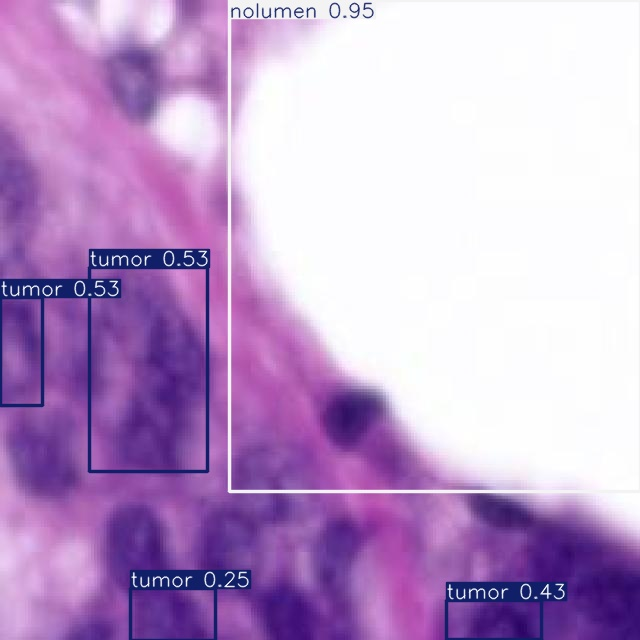

In [7]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Cargar el modelo entrenado
model = YOLO('runs/detect/train/weights/best.pt')  # Cambia esta ruta al modelo entrenado

# Ruta de la imagen de prueba
test_image_path = '/content/test/images/115_png_jpg.rf.18e8de520bd7242e8bddae0718ab5977.jpg'

# Realizar predicción y guardar el resultado
results = model.predict(source=test_image_path, save=True)  # Guarda automáticamente los resultados en runs/detect/predict

# Obtener la ruta de la imagen procesada
result_dir = "runs/detect/predict"  # Carpeta predeterminada donde se guardan los resultados
result_image_path = os.path.join(result_dir, os.path.basename(test_image_path))  # Ruta del archivo procesado

# Mostrar información de predicción
print(f"Predicción completada. Resultado guardado en: {result_image_path}")

# Mostrar la imagen procesada
display(Image(filename=result_image_path))

In [10]:
import shutil

# Definir la ruta de la carpeta en Google Colab
source_folder = "/content/runs"

# Nombre del archivo zip de salida
zip_name = "/content/YOLO11nParametros.zip"

# Crear el archivo zip de la carpeta "/content"
shutil.make_archive(base_name=zip_name.replace(".zip", ""), format='zip', root_dir=source_folder)

# Descargar el archivo zip
from google.colab import files
files.download(zip_name)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>